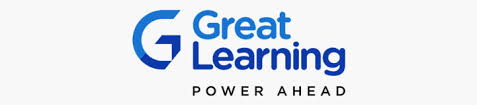

# Agenda

1. Problem Statement
2. Import necessary libraries
3. Load and explore the data
4. Build a baseline model 
4. Feature selection with wrapper methods
5. Feature selection with embedded methods (Regularization)
6. Handling imbalanced data
7. Conclusion

## 1. Problem Statement

Given is a dataset of Mushroom holds the data of 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom. Using this dataset we need to classify whether the mushroom is edible or poisonous.



### Dataset Description

The dataset can be found [here](https://www.kaggle.com/datasets/uciml/mushroom-classification)


### Features:

- Attribute Information: (classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d
 
- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso

# importing ploting libraries
import matplotlib.pyplot as plt   

%pip install imblearn

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

%pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 3. Load and Explore Data

In [7]:
mush_df = pd.read_csv("mushrooms.csv")

In [8]:
# check the no. of rows and columns in the dataset
mush_df.shape

(8124, 23)

In [9]:
mush_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
# basic info of the dataset
mush_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

- From the above output we infer that there are 8124 rows and 23 columns of datatype object.

In [11]:
#Lets analysze the distribution of the various attributes
mush_df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


- From above data description we can see the count of records for each column, number of unique values in each column, the value whose appearance frequency is high and the count/frequency which shows the frequency of the occurence of the value in the dataset.

In [12]:
# Check for presence of null values
mush_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

From the above result we get to see that there are zero null values in the dataset

In [13]:
# Let us look at the target column which is 'class' to understand how the data is distributed
mush_df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

c:\Users\thenu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


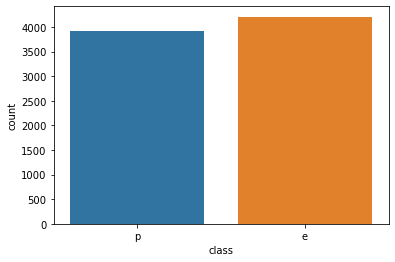

In [14]:
sns.countplot(mush_df['class'])
plt.show()

In [15]:
X=mush_df.drop('class',axis=1) 
Y=mush_df['class'] 
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [16]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_Y=LabelEncoder()
Y = Encoder_Y.fit_transform(Y)

In [17]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [18]:
## here 1= poisonous and 0= eatable
Y

array([1, 0, 0, ..., 0, 1, 0])

## 4. Build a baseline Model

In [19]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5921,5,2,0,1,2,1,0,0,3,1,...,0,7,7,0,2,1,4,1,4,5
1073,5,0,3,1,5,1,0,0,7,1,...,2,6,7,0,2,1,4,2,5,0
3710,5,0,3,0,2,1,0,0,7,0,...,1,4,0,0,2,1,2,1,4,0
144,5,3,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,2,2,1
5469,5,3,4,0,8,1,0,1,0,1,...,1,7,6,0,2,1,0,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,5,3,4,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,4
5390,3,3,2,1,5,1,0,0,10,0,...,2,7,2,0,2,2,0,7,1,6
860,2,3,4,1,3,1,0,0,10,0,...,3,7,7,0,2,1,4,3,5,4
7603,3,2,2,0,2,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,4


In [21]:
#create an instance
regression_model = LogisticRegression(max_iter=10000)
#learning
regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [22]:
# Train Accuracy
print('Train data Accuracy is: ',regression_model.score(X_train, y_train))

Train data Accuracy is:  0.9481181850158283


In [23]:
# Test Accuracy
print('Test data Accuracy is: ',regression_model.score(X_test, y_test))

Test data Accuracy is:  0.9491386382280558


In [30]:
prediction=regression_model.predict(X_test)
print(metrics.confusion_matrix(y_test, prediction))
print(metrics.classification_report(y_test, prediction))

[[1201   56]
 [  68 1113]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1257
           1       0.95      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



## 5. Feature Selection using Wrapper Methods

### 5.1 Forward Selection

In [24]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5921,5,2,0,1,2,1,0,0,3,1,...,0,7,7,0,2,1,4,1,4,5
1073,5,0,3,1,5,1,0,0,7,1,...,2,6,7,0,2,1,4,2,5,0
3710,5,0,3,0,2,1,0,0,7,0,...,1,4,0,0,2,1,2,1,4,0
144,5,3,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,2,2,1
5469,5,3,4,0,8,1,0,1,0,1,...,1,7,6,0,2,1,0,7,4,0


In [25]:
# Build Log Reg  to use in feature selection
logR = LogisticRegression(max_iter=1000)
# Build step forward feature selection
sfs1 = sfs(logR, k_features=15, forward=True, cv=15)
# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [27]:
sfs2=sfs1.get_metric_dict()

AttributeError: SequentialFeatureSelector has not been fitted, yet.

In [34]:
#Converting result of sf1 to dataframe
sfs2 = pd.DataFrame.from_dict(sfs2)

In [35]:
sfs2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
feature_idx,"(18,)","(6, 18)","(6, 17, 18)","(6, 7, 17, 18)","(6, 7, 11, 17, 18)","(0, 6, 7, 11, 17, 18)","(0, 1, 6, 7, 11, 17, 18)","(0, 1, 2, 6, 7, 11, 17, 18)","(0, 1, 2, 3, 6, 7, 11, 17, 18)","(0, 1, 2, 3, 4, 6, 7, 11, 17, 18)","(0, 1, 2, 3, 4, 6, 7, 11, 16, 17, 18)","(0, 1, 2, 3, 4, 6, 7, 11, 13, 16, 17, 18)","(0, 1, 2, 3, 4, 6, 7, 11, 12, 13, 16, 17, 18)","(0, 1, 2, 3, 4, 6, 7, 11, 12, 13, 15, 16, 17, 18)","(0, 1, 2, 3, 4, 6, 7, 11, 12, 13, 15, 16, 17, ..."
cv_scores,"[0.7526315789473684, 0.7757255936675461, 0.794...","[0.8473684210526315, 0.862796833773087, 0.8944...","[0.8763157894736842, 0.9102902374670184, 0.907...","[0.9078947368421053, 0.941952506596306, 0.9393...","[0.9236842105263158, 0.9630606860158312, 0.960...","[0.9236842105263158, 0.9630606860158312, 0.960...","[0.9236842105263158, 0.9630606860158312, 0.960...","[0.9236842105263158, 0.9630606860158312, 0.960...","[0.9236842105263158, 0.9630606860158312, 0.960...","[0.9236842105263158, 0.9630606860158312, 0.965...","[0.9315789473684211, 0.9630606860158312, 0.965...","[0.9315789473684211, 0.9630606860158312, 0.965...","[0.9342105263157895, 0.9630606860158312, 0.970...","[0.9342105263157895, 0.9630606860158312, 0.970...","[0.9342105263157895, 0.9630606860158312, 0.970..."
avg_score,0.764687,0.863175,0.893777,0.919629,0.938096,0.938096,0.938096,0.938096,0.938096,0.943549,0.947242,0.947769,0.948824,0.949,0.949
feature_names,"(ring-type,)","(gill-spacing, ring-type)","(gill-spacing, ring-number, ring-type)","(gill-spacing, gill-size, ring-number, ring-type)","(gill-spacing, gill-size, stalk-surface-above-...","(cap-shape, gill-spacing, gill-size, stalk-sur...","(cap-shape, cap-surface, gill-spacing, gill-si...","(cap-shape, cap-surface, cap-color, gill-spaci...","(cap-shape, cap-surface, cap-color, bruises, g...","(cap-shape, cap-surface, cap-color, bruises, o...","(cap-shape, cap-surface, cap-color, bruises, o...","(cap-shape, cap-surface, cap-color, bruises, o...","(cap-shape, cap-surface, cap-color, bruises, o...","(cap-shape, cap-surface, cap-color, bruises, o...","(cap-shape, cap-surface, cap-color, bruises, o..."
ci_bound,0.0106,0.008967,0.007356,0.006269,0.007059,0.007059,0.007059,0.007059,0.007059,0.006614,0.005532,0.005564,0.005973,0.006094,0.006094
std_dev,0.018608,0.015741,0.012913,0.011004,0.012393,0.012393,0.012393,0.012393,0.012393,0.01161,0.009711,0.009767,0.010485,0.010698,0.010698
std_err,0.004973,0.004207,0.003451,0.002941,0.003312,0.003312,0.003312,0.003312,0.003312,0.003103,0.002595,0.00261,0.002802,0.002859,0.002859


In [36]:
# import required lbraries to plot the graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

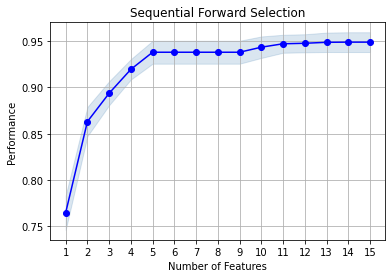

In [37]:
fig = plot_sfs(sfs2)

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [38]:
# Which features?
columnList = list(X)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 6, 7, 11, 12, 13, 15, 16, 17, 18, 20]


In [39]:
# to fetch the names of the columns using the index
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-spacing', 'gill-size', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'population']


#### Build full model with forward selection features

In [40]:
logR1 = LogisticRegression(max_iter=1000)
logR1.fit(X_train[subsetColumnList], y_train)

LogisticRegression(max_iter=1000)

In [41]:
y_train_pred = logR1.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % logR1.score(X_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.950


In [42]:
y_test_pred = logR1.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % logR1.score(X_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.950


In [43]:
prediction=logR1.predict(X_test[subsetColumnList])
print(metrics.confusion_matrix(y_test, prediction))
print(metrics.classification_report(y_test, prediction))

[[1205   52]
 [  71 1110]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1257
           1       0.96      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



### 5.2 Backward Elimination

In [44]:
# Build LogReg  to use in feature selection
logR2 = LogisticRegression(solver='lbfgs', max_iter=1000)
# Build backward feature selection
logreg_backward = sfs(logR2, k_features=15, forward=False, cv=15)
# Perform SFFS
sfs_backward = logreg_backward.fit(X_train.values, y_train)

In [45]:
sfs_backward1=sfs_backward.get_metric_dict()

In [46]:
#Converting result of sf1 to dataframe
sfs_backward1 = pd.DataFrame.from_dict(sfs_backward1)

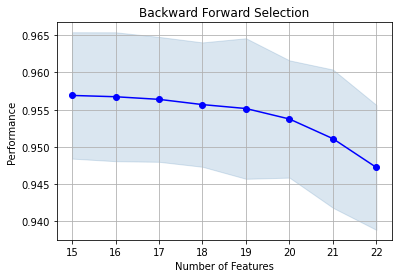

In [51]:
fig = plot_sfs(sfs_backward1)

plt.title('Backward Forward Selection')
plt.grid()
plt.show()

In [52]:
feat_cols = list(sfs_backward.k_feature_idx_)
print(feat_cols)

[0, 2, 3, 4, 5, 6, 7, 10, 11, 12, 14, 15, 16, 18, 20]


In [53]:
subsetColumnList1 = [columnList[i] for i in feat_cols] 
print(subsetColumnList1)

['cap-shape', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-type', 'population']


#### Build full model with backward selection features

In [55]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train[subsetColumnList1], y_train)

y_train_pred = logreg.predict(X_train[subsetColumnList1])
print('Training accuracy on selected features: %.3f' % logreg.score(X_train[subsetColumnList1], y_train))
y_test_pred = logreg.predict(X_test[subsetColumnList1])
print('Testing accuracy on selected features: %.3f' % logreg.score(X_test[subsetColumnList1], y_test))

Training accuracy on selected features: 0.957
Testing accuracy on selected features: 0.960


In [56]:
prediction=logreg.predict(X_test[subsetColumnList1].values)
print(metrics.confusion_matrix(y_test, prediction))
print(metrics.classification_report(y_test, prediction))

[[1205   52]
 [  46 1135]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1257
           1       0.96      0.96      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


## 6. Feature Selection using Wrapper Methods (Regularization)

In [57]:
# Building a normal regression model using logistic regression

regression_model = LogisticRegression(max_iter=1000)
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cap-shape is -0.048667623578667885
The coefficient for cap-surface is 0.42827207052226596
The coefficient for cap-color is -0.03550213808925853
The coefficient for bruises is -1.2765478516239375
The coefficient for odor is -0.5012872675919464
The coefficient for gill-attachment is -1.8333549060983436
The coefficient for gill-spacing is -5.956255623251143
The coefficient for gill-size is 6.608592886635123
The coefficient for gill-color is -0.1374838712413806
The coefficient for stalk-shape is 0.36373555380782757
The coefficient for stalk-root is -1.4402360575863415
The coefficient for stalk-surface-above-ring is -3.833704092756209
The coefficient for stalk-surface-below-ring is -0.24992702671493702
The coefficient for stalk-color-above-ring is -0.14044012432419142
The coefficient for stalk-color-below-ring is -0.05747120986861164
The coefficient for veil-type is 0.0
The coefficient for veil-color is 7.222011314712947
The coefficient for ring-number is 1.1744705754276

### 5.1 Create a regularized RIDGE model and note the coefficients

In [105]:
# Building ridge regression model
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[-0.00472209  0.04312538 -0.00151667 -0.75480178 -0.04743095 -0.17947381
  -0.95923154  1.0450409  -0.02354924 -0.07148656 -0.13433545 -0.31432535
  -0.10515538 -0.02325237 -0.01415474  0.          0.84284985  0.05385801
   0.05362637 -0.09030906 -0.02299101  0.03961213]]


### 5.2 Comparing Ridge and Logistic regression scores

In [106]:
coef_df = pd.DataFrame(
    {'Columns': X_train.columns,
     'Logistic Regression': list(regression_model.coef_[0]),
     'Ridge Regression': list(ridge.coef_[0])
    })
coef_df

,Columns,Logistic Regression,Ridge Regression
0,cap-shape,-0.048668,-0.004722
1,cap-surface,0.428272,0.043125
2,cap-color,-0.035502,-0.001517
3,bruises,-1.276548,-0.754802
4,odor,-0.501287,-0.047431
5,gill-attachment,-1.833355,-0.179474
6,gill-spacing,-5.956256,-0.959232
7,gill-size,6.608593,1.045041
8,gill-color,-0.137484,-0.023549
9,stalk-shape,0.363736,-0.071487


In [107]:
# Print accuracy of log regression model 
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.9481181850158283
0.9491386382280558


In [108]:
prediction_reg = regression_model.predict(X_test)
prediction_reg

array([0, 1, 1, ..., 1, 0, 0])

In [109]:
print(metrics.confusion_matrix(y_test, prediction_reg))
print(metrics.classification_report(y_test, prediction_reg))

[[1201   56]
 [  68 1113]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1257
           1       0.95      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [110]:
# Print accuracy of ridge regression model
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9442490327119241
0.9474979491386383


In [111]:
prediction_ridge = ridge.predict(X_test)
prediction_ridge

array([0, 1, 1, ..., 1, 0, 0])

In [112]:
print(metrics.confusion_matrix(y_test, prediction_ridge))
print(metrics.classification_report(y_test, prediction_ridge))

[[1205   52]
 [  76 1105]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1257
           1       0.96      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



## 7. Handling Imbalanced Data

### 6.1 SMOTE method to upsample smaller class

In [114]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

from imblearn.over_sampling import SMOTE
#Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 2735
Before UpSampling, counts of label '0': 2951 

After UpSampling, counts of label '1': 2951
After UpSampling, counts of label '0': 2951 

After UpSampling, the shape of train_X: (5902, 22)
After UpSampling, the shape of train_y: (5902,) 



### Fit the model on upsampled data

In [115]:
# fit model on upsampled data 
model=LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.9520098441345365
[[1201   56]
 [  61 1120]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1257
           1       0.95      0.95      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



### 6.2 Undersampling using RandomUnderSampler

In [116]:
from imblearn.under_sampling import RandomUnderSampler

In [117]:
rus = RandomUnderSampler()

In [118]:
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [119]:
y_rus


array([0, 0, 0, ..., 1, 1, 1])

In [120]:
y_rus.shape

(5470,)

In [122]:
print("Before Down Sampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Down Sampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before Down Sampling, counts of label '1': 2735
Before Down Sampling, counts of label '0': 2951 



In [121]:
print("After Down Sampling, counts of label '1': {}".format(sum(y_rus==1)))
print("After Down Sampling, counts of label '0': {} \n".format(sum(y_rus==0)))

print('After Down Sampling, the shape of train_X: {}'.format(X_rus.shape))
print('After Down Sampling, the shape of train_y: {} \n'.format(y_rus.shape))

After Down Sampling, counts of label '1': 2735
After Down Sampling, counts of label '0': 2735 

After Down Sampling, the shape of train_X: (5470, 22)
After Down Sampling, the shape of train_y: (5470,) 



### Fit Model On Down Sampled Data

In [123]:
# fit model on upsampled data 
model=LogisticRegression(max_iter=1000)
model.fit(X_rus, y_rus)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.9507793273174734
[[1201   56]
 [  64 1117]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1257
           1       0.95      0.95      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



## 8. Conclusion:

- In this notebook we first build a base line model and we record it's train and test accuracy.

- We then make use of wrapper methods (Forward and Backward Feature Selection) for Feature Selection and notice that both these methods predict almost same features with the full models having same train(0.939) and test accuracy (0.940)

- We then make use of embedded methods (Ridge regression) and notice that this model is also giving the similar accuracy

- The imbalanced data is handled by making use of SMOTE method to upsample the data and RandomUnderSampler to down sample the data.

- In SMOTE analysis we first record the count before upsampling (2735,2951), which after implementing SMOTE method successfully, the count changes to (2951,2951) with model score as 0.95.

- In RandomUnderSampler when we downsample the data, the count becomes (2735,2735) with model score as 0.95